In [1]:
import os
import numpy as np
import Cell_BLAST as cb
import utils
cb.config.RANDOM_SEED = 0
cb.config.N_JOBS = 4
fixed_model_kwargs = dict(
    latent_dim=10, cat_dim=20,
    epoch=500, patience=20
)

# ---
# Zebrafish
### Alemany_Fin

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,ClusterID,cell_ontology_class,cell_ontology_id,cell_type1,dataset_name,donor,free_annotation,lifestage,organ,organism,plate,platform
4-p01-prim-R4,3.0,epidermal cell,CL:0000362,epidermis,Alemany_Fin,R4,prim,adult,Fin,Danio rerio,p01,ScarTrace
5-p01-prim-R4,3.0,epidermal cell,CL:0000362,epidermis,Alemany_Fin,R4,prim,adult,Fin,Danio rerio,p01,ScarTrace
7-p01-prim-R4,3.0,epidermal cell,CL:0000362,epidermis,Alemany_Fin,R4,prim,adult,Fin,Danio rerio,p01,ScarTrace
8-p01-prim-R4,3.0,epidermal cell,CL:0000362,epidermis,Alemany_Fin,R4,prim,adult,Fin,Danio rerio,p01,ScarTrace
9-p01-prim-R4,3.0,epidermal cell,CL:0000362,epidermis,Alemany_Fin,R4,prim,adult,Fin,Danio rerio,p01,ScarTrace


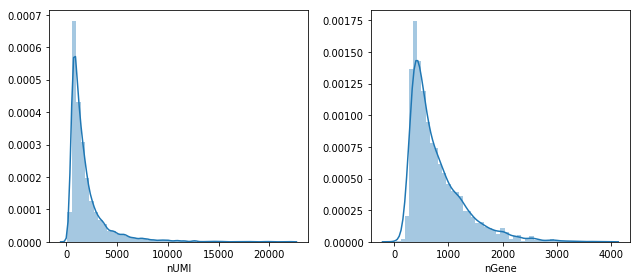

In [2]:
alemany_fin = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Alemany_Fin/data.h5")
utils.peek(alemany_fin, "Alemany_Fin")
alemany_fin = alemany_fin.normalize()
alemany_fin.obs.head()

In [3]:
opt_model_kwargs = dict(batch_effect="donor")
alemany_fin_model = cb.directi.fit_DIRECTi(
    alemany_fin, alemany_fin.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Alemany_Fin/model_0"
)
alemany_fin.latent = alemany_fin_model.inference(alemany_fin)

[DIRECTi epoch 0] train=2.703, val=2.712, time elapsed=1.3s Regular save...
[DIRECTi epoch 1] train=2.692, val=2.698, time elapsed=0.4s
[DIRECTi epoch 2] train=2.674, val=2.673, time elapsed=0.4s
[DIRECTi epoch 3] train=2.637, val=2.617, time elapsed=0.4s
[DIRECTi epoch 4] train=2.392, val=1.778, time elapsed=0.4s
[DIRECTi epoch 5] train=0.984, val=0.694, time elapsed=0.4s
[DIRECTi epoch 6] train=0.633, val=0.650, time elapsed=0.4s
[DIRECTi epoch 7] train=0.619, val=0.663, time elapsed=0.4s
[DIRECTi epoch 8] train=0.618, val=0.645, time elapsed=0.4s
[DIRECTi epoch 9] train=0.616, val=0.636, time elapsed=0.4s
[DIRECTi epoch 10] train=0.616, val=0.636, time elapsed=0.4s Regular save...
[DIRECTi epoch 11] train=0.615, val=0.636, time elapsed=0.4s
[DIRECTi epoch 12] train=0.613, val=0.627, time elapsed=0.4s
[DIRECTi epoch 13] train=0.598, val=0.608, time elapsed=0.4s
[DIRECTi epoch 14] train=0.587, val=0.608, time elapsed=0.4s
[DIRECTi epoch 15] train=0.582, val=0.599, time elapsed=0.4s
[D

[  Info   ] Computing tSNE...


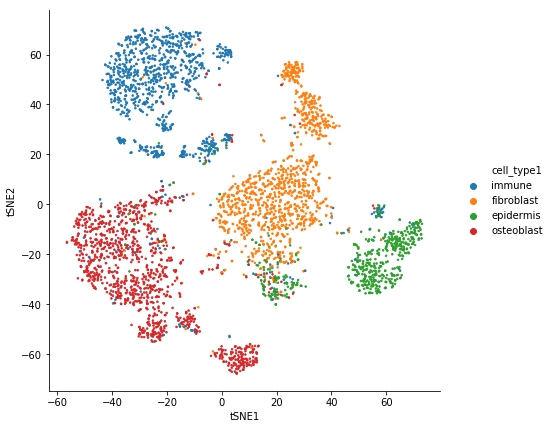

In [4]:
plot = alemany_fin.visualize_latent("cell_type1")
plot.get_figure().savefig("Alemany_Fin/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


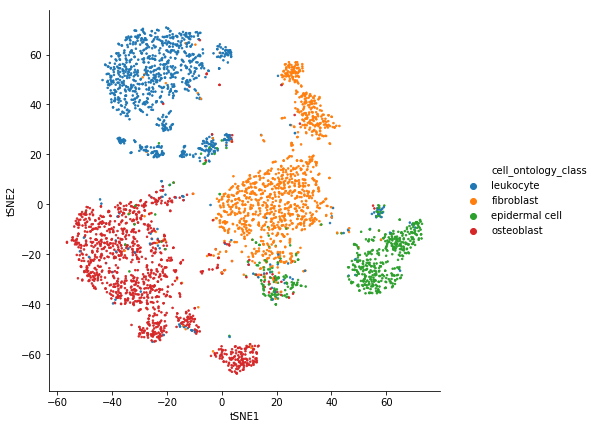

In [5]:
plot = alemany_fin.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("Alemany_Fin/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


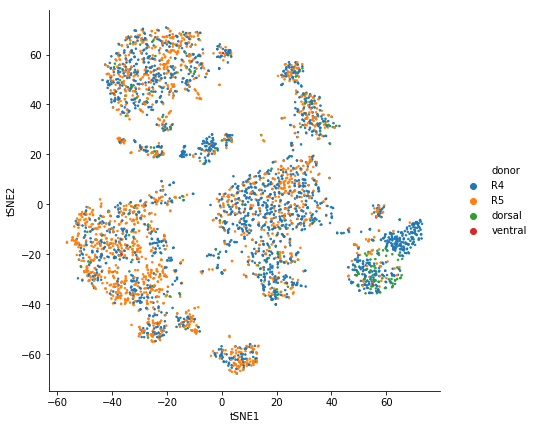

In [6]:
plot = alemany_fin.visualize_latent("donor")
plot.get_figure().savefig("Alemany_Fin/donor.pdf", bbox_inches="tight")

In [7]:
%%capture capio
alemany_fin_models = [alemany_fin_model]
opt_model_kwargs = dict(batch_effect="donor")
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    alemany_fin_models.append(cb.directi.fit_DIRECTi(
        alemany_fin, alemany_fin.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Alemany_Fin/model_%d" % i
    ))
alemany_fin_blast = cb.blast.BLAST(alemany_fin_models, alemany_fin, 
                                               keep_exprs=True).build_empirical()
alemany_fin_blast.save("Alemany_Fin")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Alemany_Fin/model_1/checkpoint-140
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Alemany_Fin/model_2/checkpoint-133
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Alemany_Fin/model_3/checkpoint-121


In [8]:
with open("Alemany_Fin/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Alemany_Fin/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [9]:
utils.self_projection(alemany_fin_blast, "Alemany_Fin")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9393
Accuracy = 0.9529
